<a href="https://colab.research.google.com/github/brunacmendes/data_science/blob/master/AirBnB_Listings_Data_Analysis_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AirBnB Listings Data Analysis — *Toronto, Canada*


[Airbnb](https://www.airbnb.com/) is a popular home-sharing site that takes a unique approach toward lodging, by offering travelers from all around the world someone's home as a place to stay instead of a traditional hotel. 

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities. AirBnB offers over [7 million accommodations and 50,000 handcrafted activities](https://news.airbnb.com/about-us/) powered by local hosts, with more than 750 million guest arrivals to date.

The website [Inside Airbnb](http://insideairbnb.com/get-the-data.html) provides us access to millions of listings that generate a lot of data - data that can be analyzed and used for many projects and solutions in the most important cities in the world.

<center><img alt="Analysing Airbnb" width="20%" src="https://logospng.org/download/airbnb/logo-airbnb-1024.png"></center>

**In this notebook, we will be working with the City of Toronto summarized dataset to take some insights from the data, which contains information about listing prices, room types, rental periods, hosts, reviews, locations, and availability.** 

To accomplish that, we're going through the following steps: 

  - Acquaring and loading the data;
  - Cleaning the data;
  - Analyzing the data.




## City of Toronto

[Toronto](https://www.toronto.ca/) is Canada’s largest city and a world leader in such areas as business, finance, technology, entertainment and culture. Its large population of immigrants from all over the globe has also made Toronto one of the most multicultural cities in the world.

It’s really important to get pricing right on Airbnb, especially in big cities like Toronto where there is a lot of competition. Welcoming over 27.5 million visitors annually, Toronto is the leading tourism destination in Canada. This bold, dynamic city offers superb attractions, music and events backed by the best convention and sports facilities in Canada. Such popularity makes the city a great place to start our analysis on AirBnb.

![](https://images.unsplash.com/photo-1486325212027-8081e485255e?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1500&q=80)
<span>Photo by <a href="https://unsplash.com/@syedzia123?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Zia Syed</a> on <a href="https://unsplash.com/?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>





## Loading Libraries and Data


* `pandas` - library for data manipulation;

* `matplotlib`, `seaborn` and `plotly` - libraries for data visualization;

* `listings.csv ` - summary information and metrics for listings in Toronto (good for visualisations), last updated on January 2, 2021.



In [1]:
# import packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline


In [2]:
# Read listings.csv into dataframe
df = pd.read_csv('http://data.insideairbnb.com/canada/on/toronto/2021-01-02/visualisations/listings.csv')


## Exploring the Dataset

Firstly, we check the amount of rows in the dataset to understand the size we are working with.

Then, we display every column to understand the variables and its types.


In [3]:
# dataset volume
print("Listings: \t {}".format(df.shape[0]))

# number of variables
print("Variables: \t {}\n".format(df.shape[1]))

# display variables & types
display(df.dtypes)


Listings: 	 18265
Variables: 	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object



---



* **`id`** - id number that identifies the property
* **`name`** - Property name
* **`host_id`** - id number that identifies the host
* **`host_name`** - Host name
* **`neighbourhood_group`** - The main regions of the city
* **`neighbourhood`** - The neighbourhoods
* **`latitude`** - Property latitude
* **`longitude`** - Property longitude
* **`room_type`** - Type of the room
* **`price`** - The price for one night
* **`minimum_nights`** - Minimum amount of nights to book the place
* **`number_of_reviews`** - Number of reviews received
* **`last_review`** - Date of the last review
* **`reviews_per_month`** - Amount of reviews per month
* **`calculated_host_listings_count`** - Number of properties available on airbnb owned by the host
* **`availability_365`** - Number of days of availability within 365 days



---


These 16 columns provide a rich amount of information for data exploration. We already see some missing values, which will require cleaning and handling of NaN values.

Before we perform an analysis, we'll first see what our *dataset* looks like, by presenting the first ten entries.

In [4]:
# show first 10 entries
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.11,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,96,180,169,2013-08-27,1.22,2,365
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,64,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,70,1,217,2019-12-22,1.68,2,324
4,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,45,365,26,2011-08-30,0.20,1,0
5,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64151,-79.37643,Entire home/apt,127,180,1,2010-08-11,0.01,2,365
6,40456,Downtown 2 Bdr.Apt with King Size Bed and Par...,174063,Denis,NaN,South Parkdale,43.63532,-79.44049,Entire home/apt,100,30,111,2020-10-31,0.87,5,335
7,41887,Great location,183071,Kyle,NaN,Oakridge,43.69466,-79.28667,Entire home/apt,70,2,83,2020-10-26,1.66,2,0
8,42892,Downtown 3 Beds 2 Baths @ Union & Harbourfront,187320,Downtown Suite Living,NaN,Waterfront Communities-The Island,43.64451,-79.38185,Entire home/apt,115,29,0,NaN,NaN,13,302
9,43964,Bright entire 2-bedrm basement suite private e...,192364,Mitra,NaN,Wexford/Maryvale,43.74948,-79.29147,Private room,93,2,31,2020-09-28,0.64,1,0


### **Missing data**

After looking at the head of the *dataset* we were already able to notice some NaN values, therefore we need to examine the missing values further before continuing with analysis.

The 'sum' function will show us the percentage of null values in each column in dataset.


* The column `neighbourhood_group` is missing 100% of their values.
* The variables `reviews_per_month` and `last_review` have 22,47% of missing values in the dataset.
* The variable  `host_name` has 0,01% of missing values.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(round(df.isnull().sum() / df.shape[0] *100,2)).sort_values(ascending=False)

neighbourhood_group               100.00
reviews_per_month                  22.47
last_review                        22.47
host_name                           0.06
name                                0.01
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
minimum_nights                      0.00
price                               0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
id                                  0.00
dtype: float64

The columns `last_review` and `review_per_month` need very simple handling. To elaborate, `last_review` is date; if there were no reviews for the listing, date will not exist. In our case, this column is irrelevant to our analysis. For the `review_per_month ` column we can simply append it with 0.0 for missing values (null values); we can see that in `number_of_reviews` that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month. The column `neighbourhood_group` does not present any values, so it can be removed as well.

In [6]:
#dropping columns that are not significant for future data exploration
df.drop(['host_name','last_review','neighbourhood_group'], axis=1, inplace=True)

#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)

#examing the changes
df.head(10)

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,0.11,1,0
1,8077,Downtown Harbourfront Private Room,22795,Waterfront Communities-The Island,43.64105,-79.37628,Private room,96,180,169,1.22,2,365
2,12604,Seaton Village Parlour Bedroom,48239,Annex,43.66724,-79.41598,Private room,64,1,0,0.00,1,0
3,23691,Queen Bedroom close to downtown,93825,Briar Hill-Belgravia,43.69602,-79.45468,Private room,70,1,217,1.68,2,324
4,27423,Executive Studio Unit- Ideal for One Person,118124,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,45,365,26,0.20,1,0
5,30931,Downtown Toronto - Waterview Condo,22795,Waterfront Communities-The Island,43.64151,-79.37643,Entire home/apt,127,180,1,0.01,2,365
6,40456,Downtown 2 Bdr.Apt with King Size Bed and Par...,174063,South Parkdale,43.63532,-79.44049,Entire home/apt,100,30,111,0.87,5,335
7,41887,Great location,183071,Oakridge,43.69466,-79.28667,Entire home/apt,70,2,83,1.66,2,0
8,42892,Downtown 3 Beds 2 Baths @ Union & Harbourfront,187320,Waterfront Communities-The Island,43.64451,-79.38185,Entire home/apt,115,29,0,0.00,13,302
9,43964,Bright entire 2-bedrm basement suite private e...,192364,Wexford/Maryvale,43.74948,-79.29147,Private room,93,2,31,0.64,1,0


### **Variable Distribution**

Histograms are important so we can see the distribuition for each variable and verify the existence of *outliers.* An outlier is an observation that lies an abnormal distance from other values in a dataset.


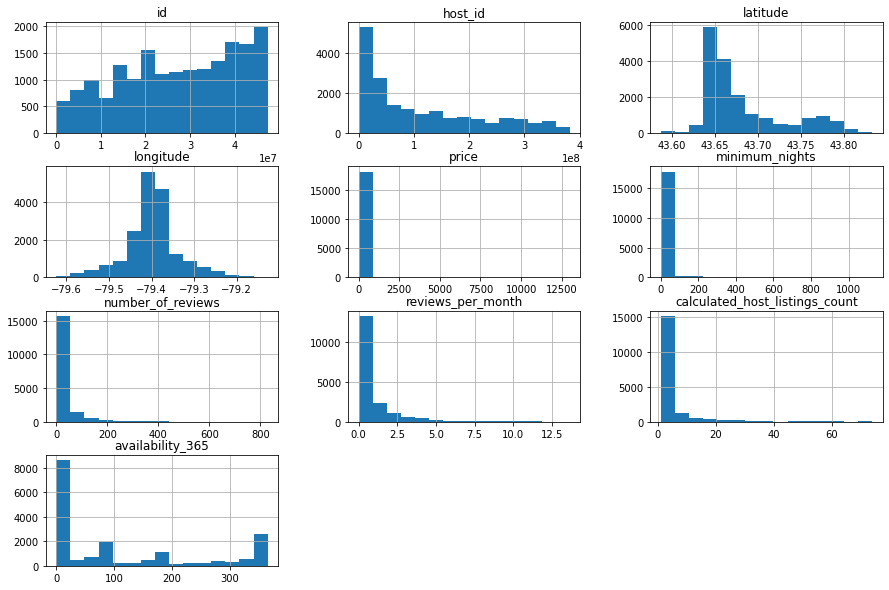

In [7]:
# histogram
df.hist(bins=15, figsize=(15,10));

### **Identifying and Removing Outliers**

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. Examination of the data for unusual observations that are far removed from the mass of data. These points are often referred to as outliers.

Those values don't follow a distribution, and they distort the graphic representation.

One of the ways to look for outliers in a dataset is by using the `describe()` method, which will show us statistics of the variables.

In [8]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18265.0,18265.0,18265.0,18265.0,18265.0,18265.0
mean,137.7,13.5,26.0,0.8,4.7,111.4
std,306.4,38.0,53.0,1.4,9.6,136.5
min,0.0,1.0,0.0,0.0,1.0,0.0
25%,60.0,1.0,1.0,0.0,1.0,0.0
50%,95.0,2.0,5.0,0.3,1.0,52.0
75%,149.0,20.0,26.0,1.0,3.0,180.0
max,13000.0,1125.0,828.0,13.7,74.0,365.0


Let's take a look at the `price` column. The minimum price is \$0 and the maximum is \$13000, but the average price is \$137.7 and 75% of them are below \$149.

The same happens in the `minimum_nights` column. The maximum value is 1125 nights, which corresponds to several years and that makes no sense.

Values like these can distort reality and any analysis we may attempt to perform. 

We can idenfy outliers by using the Interquartile Rule (IQR Score). Any set of data can be described by its five-number summary. These five numbers, which give you the information you need to find patterns and outliers, consist of (in ascending order):
*   The minimum or lowest value of the dataset
*   The first quartile Q1, which represents a quarter of the way through the list of all data (25%)
*  The median of the data set, which represents the midpoint of the whole list of data (50%)
* The third quartile Q3, which represents three-quarters of the way through the list of all data (75%)
* The maximum or highest value of the data set.

All you do to find the IQR of a dataset is subtract the first quartile from the third quartile:

# IQR = Q3 – Q1.

The outliers are removed using these steps:

* Calculate the IQR
* Multiply the IQR by 1.5 (a constant used to discern outliers).
* Add 1.5 x (IQR) to the third quartile (75%). Any number greater than this is a suspected outlier.
* Subtract 1.5 x (IQR) from the first quartile (25%). Any number less than this is a suspected outlier.

For the columns `price` and `minimum_nights`, we'll plot boxplots so we can take a closer look at their distribution. In the code below, we're also going to find and remove the outliers using the IQR rule.

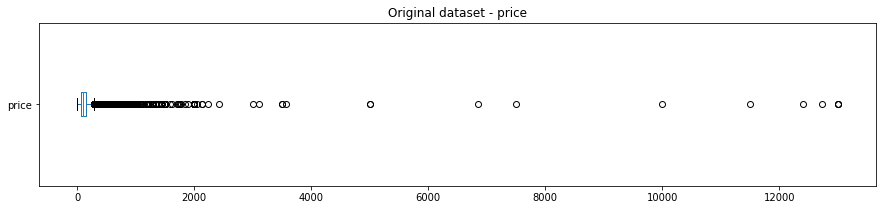

IQR price:  89.0
Upper limit:  282.5
Lower limit:  -73.5
1200 Entries above upper limit
6.57% of dataset


In [9]:
# Displaying the box plot for price
fig, ax = plt.subplots(figsize=(15,3))
df['price'].plot(kind='box', vert=False)
ax.set_title('Original dataset - price')
plt.show()


# IQR rule for variable price
q1_price = df.price.quantile(q=0.25)
q3_price = df.price.quantile(q=0.75)
IQR_price = q3_price - q1_price

print('IQR price: ', IQR_price)

sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Upper limit: ', sup_price)
print('Lower limit: ', inf_price)


print("{} Entries above upper limit".format(len(df[df.price > sup_price])))
print("{:.2f}% of dataset".format((len(df[df.price > sup_price]) / df.shape[0])*100))

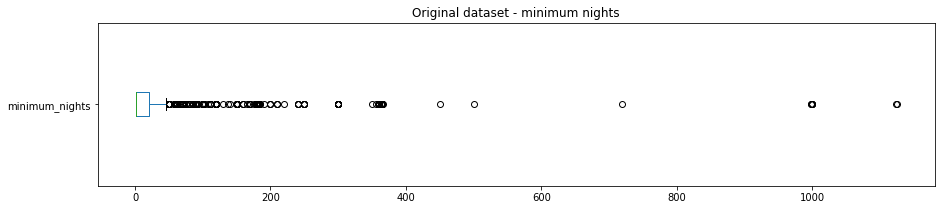

IQR minimum_nights:  19.0
Upper limit:  48.5
Lower limit:  -27.5
626 Entries above upper limit
3.43% of dataset


In [10]:
# Displaying the box plot for minimum nights
fig, ax = plt.subplots(figsize=(15,3))
df['minimum_nights'].plot(kind='box', vert=False)
ax.set_title('Original dataset - minimum nights')
plt.show()

# IQR rule for variable minimum nights
q1_mn = df.minimum_nights.quantile(q=0.25)
q3_mn = df.minimum_nights.quantile(q=0.75)
IQR_mn = q3_mn - q1_mn

print('IQR minimum_nights: ', IQR_mn)

sup_mn = q3_mn + 1.5 * IQR_mn
inf_mn = q1_mn - 1.5 * IQR_mn

print('Upper limit: ', sup_mn)
print('Lower limit: ', inf_mn)

print("{} Entries above upper limit".format(len(df[df.minimum_nights > sup_mn])))
print("{:.2f}% of dataset".format((len(df[df.minimum_nights > sup_mn]) / df.shape[0])*100))

Taking this into consideration, we create another data frame called 'df_clean' so we can store a clean dataset. We remove all entries where the `prices` are equal to \$0 and higher than \$282,5. We do the same process with the variable `minimum_nights` to drop all values above 48 nights.

Let's check how the boxplots and histograms look like now.

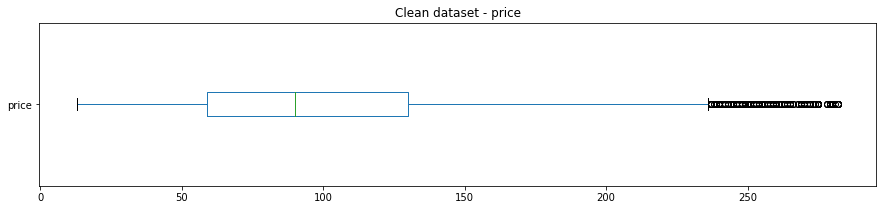

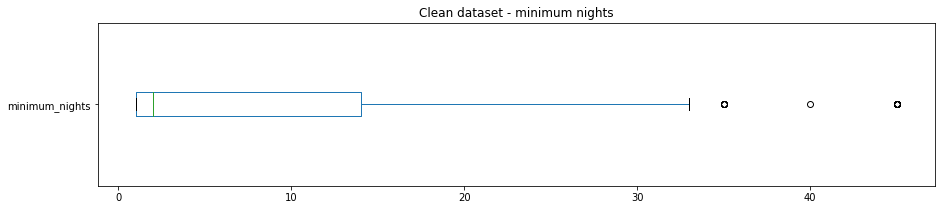

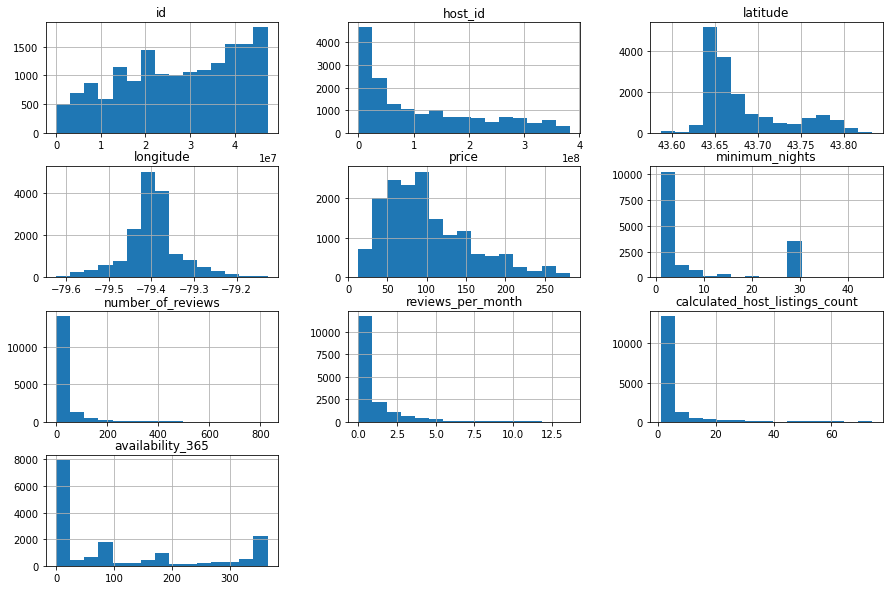

In [11]:
# Selecting the rows that fulfil the established requirements
df_clean = df[(df['price'] <= 282.5) & (df['price'] > 0) & (df['minimum_nights'] <= 48)].copy()

#plotting the boxplots again
fig, ax = plt.subplots(figsize=(15,3))
df_clean['price'].plot(kind='box', vert=False)
ax.set_title('Clean dataset - price')
plt.show()


fig, ax = plt.subplots(figsize=(15,3))
df_clean['minimum_nights'].plot(kind='box', vert=False)
ax.set_title('Clean dataset - minimum nights')
plt.show()


# Plotting the histograms again
df_clean.hist(bins=15, figsize=(15,10));

### **Correlations**

Now let's see if there's any correlation between the variables in the dataset.

We first create a correlation matrix using the corr method and then we use the heat_map function from seaborn to visualize this matrix.

In [12]:
corr = df_clean[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.027885,0.014375,0.013173,0.031968,-0.001548
minimum_nights,-0.027885,1.000000,0.004667,-0.043112,0.105680,0.175781
number_of_reviews,0.014375,0.004667,1.000000,0.802900,-0.053302,0.067330
reviews_per_month,0.013173,-0.043112,0.802900,1.000000,-0.018527,0.065132
calculated_host_listings_count,0.031968,0.105680,-0.053302,-0.018527,1.000000,0.165998
availability_365,-0.001548,0.175781,0.067330,0.065132,0.165998,1.000000


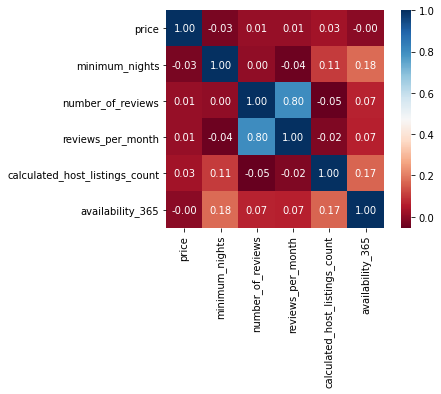

In [13]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

As we see, the variables don't seem to be significantly correlated to each other.


## **Exploratory Questions**


We are going to answer some questions to gather insights from the dataset.

### **Q1. Which property types are the most listed in AirBnB in Toronto?**


In [14]:
# number of listings by type of property
df_clean.room_type.value_counts()


Entire home/apt    10004
Private room        6123
Shared room          301
Hotel room            56
Name: room_type, dtype: int64

In [15]:
#percentage of properties by type
room_per = df_clean.room_type.value_counts() / df_clean.shape[0] *100
print(room_per)

Entire home/apt    60.689153
Private room       37.145110
Shared room         1.826013
Hotel room          0.339723
Name: room_type, dtype: float64




---


The graph below illustrates the percentage of each property type listing in Toronto on AirBnB. 

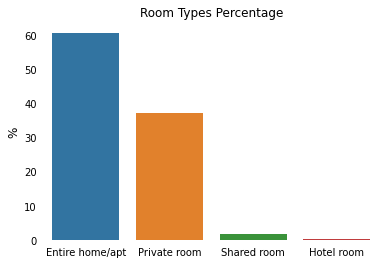

In [16]:
# Plotting the percentage of rooms for each room type
ax = sns.barplot(room_per.index, room_per) 
ax.set_title('Room Types Percentage')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('%', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

As we can see from the graph, entire apartments and private rooms are the majority of listed properties in Toronto (59,3% and 38,3%, respectively).

### **Q2. Which neighborhoods have the most expensive listing prices on average?**

We'll now investigate prices in different regions of the city. 



In [17]:
# Calculating the average price per neighbourhood
q2_table = df_clean.groupby(['neighbourhood']).price.mean().round(2)
q2_table = q2_table.sort_values(ascending=False)[:10]

fig = go.Figure(data=[go.Table(
    header=dict(values=list(['Neighbourhood','Average Price']),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[q2_table.index,q2_table],
               fill_color='lavender',
               align='left'))
])

fig.show()


We can also visually inspect the price of listings by creating a scatter map with the `longitude` and `latitude` columns of the dataset. 

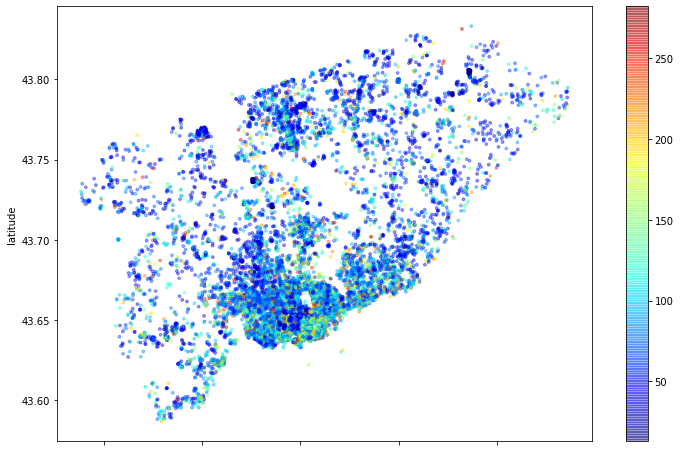

In [18]:
# Scatter map of AirBnB  prices by neighbourhood in Toronto
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))



The difference between the average prices in the ten most expensive neighborhoods is not significant, but as shown by the results, the Waterfront Communities have a higher average price.

### **Q3. What’s the average listing price by property type?**

In [19]:
# Calculating the average price by property types
var = df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)[:10]
print(var)

room_type
Entire home/apt    123.773191
Hotel room          94.142857
Private room        65.293157
Shared room         42.554817
Name: price, dtype: float64


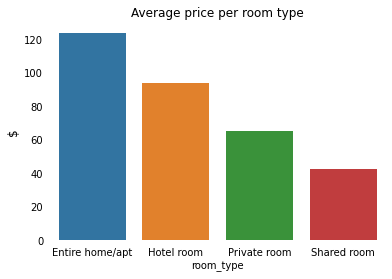

In [20]:
# Plotting the average price by type of property
ax = sns.barplot(var.index, var) 
ax.set_title('Average price per room type')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Entire apartments and houses have the highest prices in Toronto.

## Conclusion


The exploratory analysis above highlights some interesting trends and data, allowing us to take a closer look at the Airbnb listings in Toronto. 
As we went through the data exploration steps, we reach the following conclusions:

* The Waterfront Communities - The Island is the most high-priced place to stay in the city of Toronto on average.

* Entire rooms/apartments are the most common room type, as well as the most expensive to afford.

* The majority of the listings are located in the districts of Old Toronto, as well as the most expensive. If you don't want to spend much money, maybe consider finding listings a little farther from Downtown.
